Dataset: [Customer Personality Analysis](https://drive.google.com/file/d/19TUlAkMBRQi4MKfimeYBxCrFSeYk0ZGr/view?usp=sharing)

## Importing Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
import inflection

from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 5)
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['axes.labelsize'] = 14
rcParams['axes.titlesize'] = 14
sns.set_style('whitegrid')

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from tqdm.auto import tqdm

nK = 10
SEED = 10

COLOR = '#319DA0'

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')



def load_dataset(path):
    df = pd.read_csv(path)
    return df

# Task 3 - Data Modeling | K-Means Clustering

**Tahapan Pengerjaan**
1. Melihat jumlah cluster yang tepat dengan menggunakan elbow method
2. Melakukan implementasi clustering dengan menggunakan k-means clustering
3. Menghitung sillhouette score melihat bagaimana performa model yang didapat

[102156.63906080175, 75786.37182338821, 59451.09560301759, 53153.34086050464, 48128.129159445176, 44715.59752524896, 41704.00757851697, 39240.61094012354, 37910.336415795035, 36682.08631829302, 35568.98531015086, 34589.67051151928, 33965.99286339753, 32978.20664847721, 32459.260130990297, 31591.90346899978, 30993.936374529905, 30512.534499044323]


<AxesSubplot:title={'center':'Elbow Method of K-means Clustering'}>

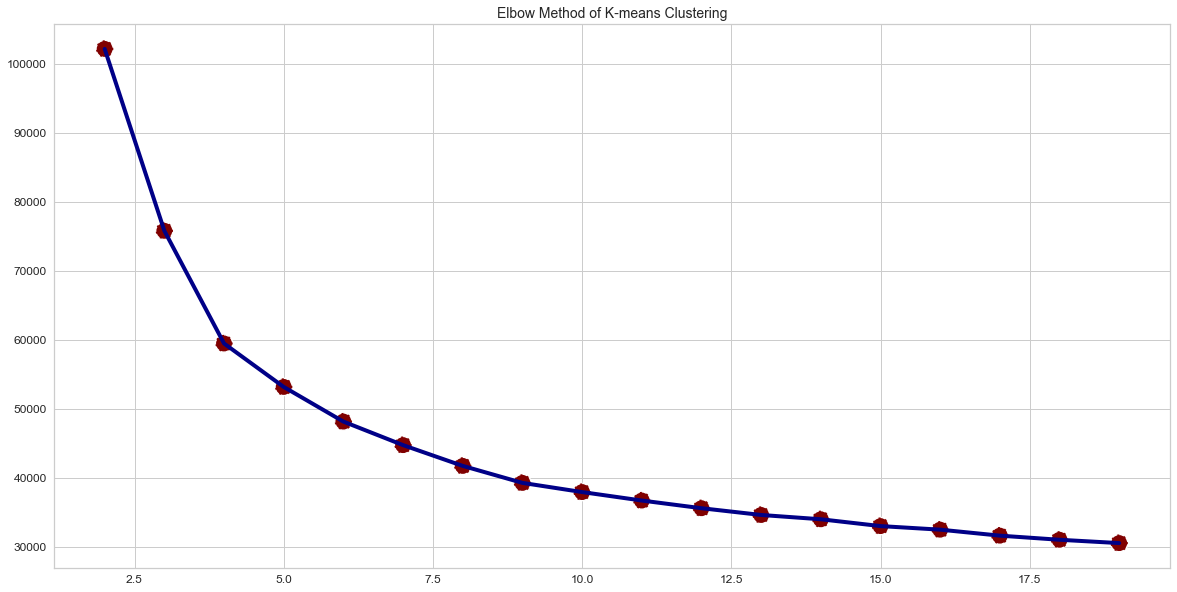

In [31]:
score = []
for i in range(2, 20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X.values)
    score.append(kmeans.inertia_)

print(score)
plt.figure(figsize=(20, 10))
plt.title('Elbow Method of K-means Clustering')
# plt.plot(inertia)

sns.lineplot(x=range(2, 20), y=score, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 20), y=score, s=300, color='#800000',  linestyle='--')

In [32]:
# elbow score plot with Yellowbrick
def elbowplot(df, elbowmetric, model):
    print("Elbow Score Plot (" + str(elbowmetric) + " metric):")
    vis = KElbowVisualizer(
        model, 
        k=(2, nK), 
        metric=elbowmetric,
        locate_elbow=True, 
        timings=False)
    vis.fit(df)      
    print("elbow value = optimal k:", f'{vis.elbow_value_:.0f}', \
            " | elbow score:", f'{vis.elbow_score_:,.3f}')
    vis.show()  

  0%|          | 0/3 [00:00<?, ?it/s]

Elbow Score Plot (distortion metric):
elbow value = optimal k: 4  | elbow score: 59,450.197


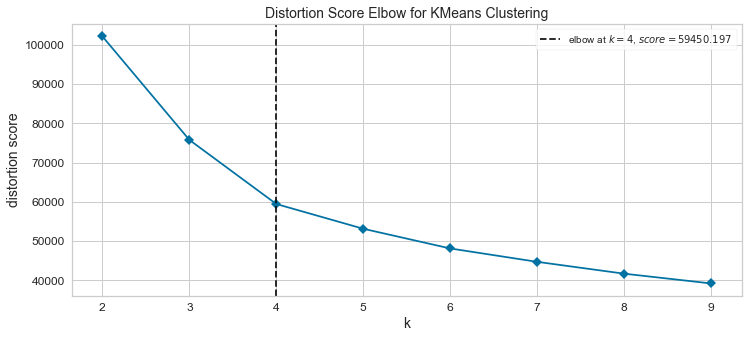

Elbow Score Plot (silhouette metric):
elbow value = optimal k: 2  | elbow score: 0.476


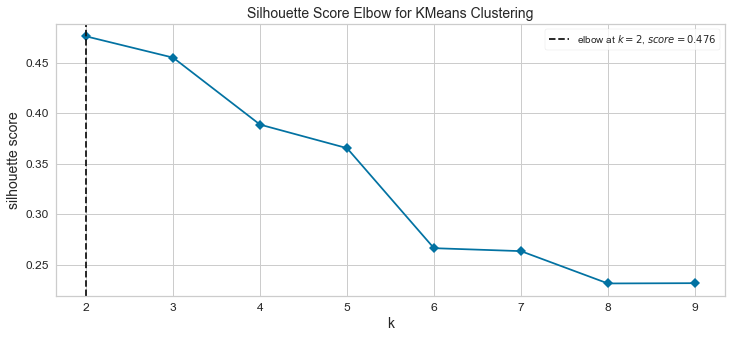

Elbow Score Plot (calinski_harabasz metric):
elbow value = optimal k: 2  | elbow score: 2,722.488


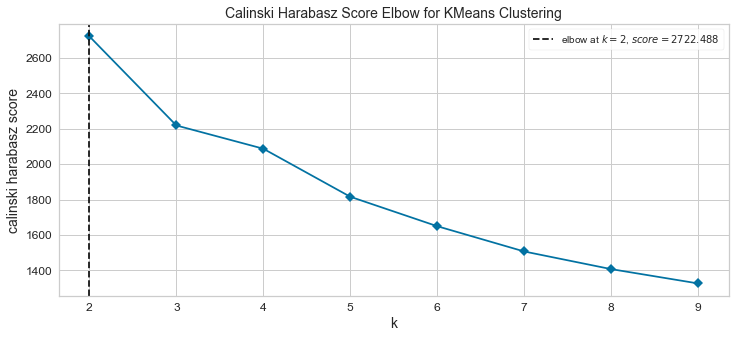

In [33]:
model = KMeans(random_state=SEED)
_ = [elbowplot(X, m, model) for m in tqdm(["distortion", "silhouette", "calinski_harabasz"])]

inertia scores (sum of squared errors) by number of clusters:
2 : 102,157
3 : 75,786
4 : 59,450
5 : 53,146
6 : 48,128
7 : 44,720
8 : 41,704
9 : 39,217


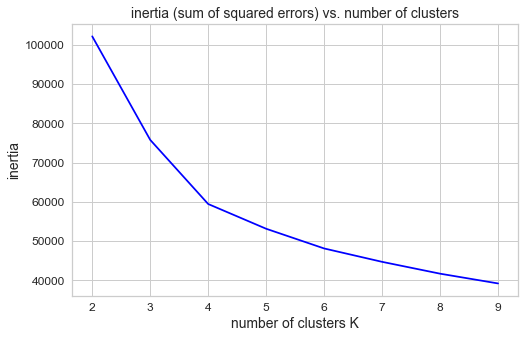

In [34]:
# kmeans: looking for the elbow - compare number of clusters by their inertia scores
# run kMeans for alternative number of clusters k
inertia_scores = [KMeans(
                    n_clusters=k, 
                    init='k-means++', 
                    n_init=10, max_iter=100, random_state=SEED). \
                    fit(X).inertia_ \
                    for k in range(2,nK)]


dict_inertia = dict(zip(range(2,nK), inertia_scores))
print("inertia scores (sum of squared errors) by number of clusters:")
_ = [print(k, ":", f'{v:,.0f}') for k,v in dict_inertia.items()]

# scree plot: look for elbow
plt.figure(figsize=[8,5])
plt.plot(range(2,nK), inertia_scores, color="blue")
plt.title("inertia (sum of squared errors) vs. number of clusters")
plt.xticks(np.arange(2,nK,1.0))
plt.xlabel("number of clusters K")
plt.ylabel("inertia");